# **Exploratory Data Analysis For Machine Learning (EDA-ML)**

**Exploratory Data Analysis** refers to the critical **process** of performing **initial investigations** on data so as *to discover patterns*,*to spot anomalies*,*to test hypothesis* and *to check assumptions* with the help of **summary statistics** and **graphical representations**.

# 1. Importing the dataset.

In [1]:
# Importing python libraries needed
import pandas as pd
import numpy as np

Our Diamonds Prices dataset:
![](https://user-images.githubusercontent.com/36210723/182397020-a1bcc086-d086-4e37-9975-99a762f328c6.png)

In [2]:
# importing data by reading the CSV file as a pandas DataFrame.
data = pd.read_csv('/kaggle/input/diamonds-prices/Diamonds Prices2022.csv', index_col=0)

# 2. Understanding the big picture.

Reading the data & showing the fisrt five rows.

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Showing the number of rows & columns in this dataset.

In [4]:
print(f"Number of samples : {data.shape[0]}")
print(f"Number of features : {data.shape[1]}")

Number of samples : 53943
Number of features : 10


The describe function does exactly this: it provides purely descriptive information about the dataset. This information includes statistics that summarize the central tendency of the variable, their dispersion, the presence of empty values and their shape. **But it shows only the numerical values**

In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Unlike **.describe()**, **.info()** gives us a shorter summary of our dataset. It returns us information about **the data type**, **non-null values** and **memory usage**.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**Notice :** 
+ As we can see our dataset it has **no NaN values** which is a great thing.
+ Our data types are : **float64(6)**, **int64(1)** and **object(3)**. The numbers between the brackets represente **the number of features** which has that kind of data type. 

**What is our goal?**
- As we can see it's a task of predicting **the price of a specific diamond**, which is a numerical value (***int64(1)***). So it's clear that it's a **regression task**. And we will use only the **float64(6)** features, unless we needed to create other features.


# 3. Preparation

At this stage we want to start *cleaning* our dataset in order to continue the analysis. Some of the questions we will ask ourselves are :

+ are there any useless or redundant variables?
+ are there any duplicate rows?
+ does the nomenclature make sense?
+ are there any new variables we want to create?

**We have 3 features :** cut, color and clarity.
They are not a numerical value, which mean maybe they will be useless and won't effect on our prediction task.
But we need to check out this than we will decide to remove them or convert them to numerical values.

**Checking if there is any duplicate rows.**

In [7]:
# The number of duplicate rows.
print(f'The number of duplicate rows : {data.duplicated().sum()}') 

The number of duplicate rows : 149


**Making a copy of our data & Removing the duplicate rows.**

In [8]:
import copy # Importing the library. 

# Copy the data by deepcopy function.
copyData = copy.deepcopy(data) 

# Removing the duplicate rows.
copyData.drop_duplicates(inplace= True)

# Checking.
print(f'The number of duplicate rows : {copyData.duplicated().sum()}')

The number of duplicate rows : 0


**The nomenclatures make sense and are clear.** No need to rename columns.

**Notice :**
+ ***For now we will not create any new features untill we check the impact of that.***

# 4.  Understanding of the variables

# * Importing libraries 

In [9]:
# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# Ploting

**Ploting the cut counts**

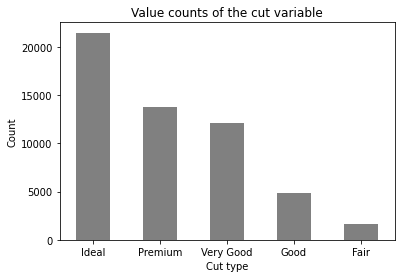

In [10]:
copyData.cut.value_counts().plot(kind="bar", color='gray')
plt.title("Value counts of the cut variable")
plt.xlabel("Cut type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Ploting the color counts**

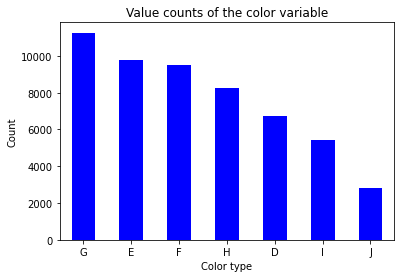

In [11]:
copyData.color.value_counts().plot(kind="bar", color='blue')
plt.title("Value counts of the color variable")
plt.xlabel("Color type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Ploting the clarity counts**

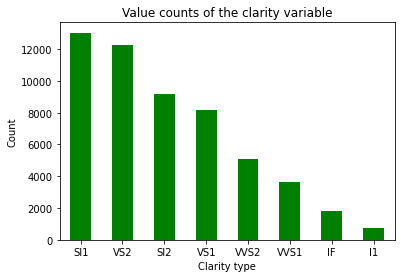

In [12]:
copyData.clarity.value_counts().plot(kind="bar", color='green')
plt.title("Value counts of the clarity variable")
plt.xlabel("Clarity type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Checking for outliers**

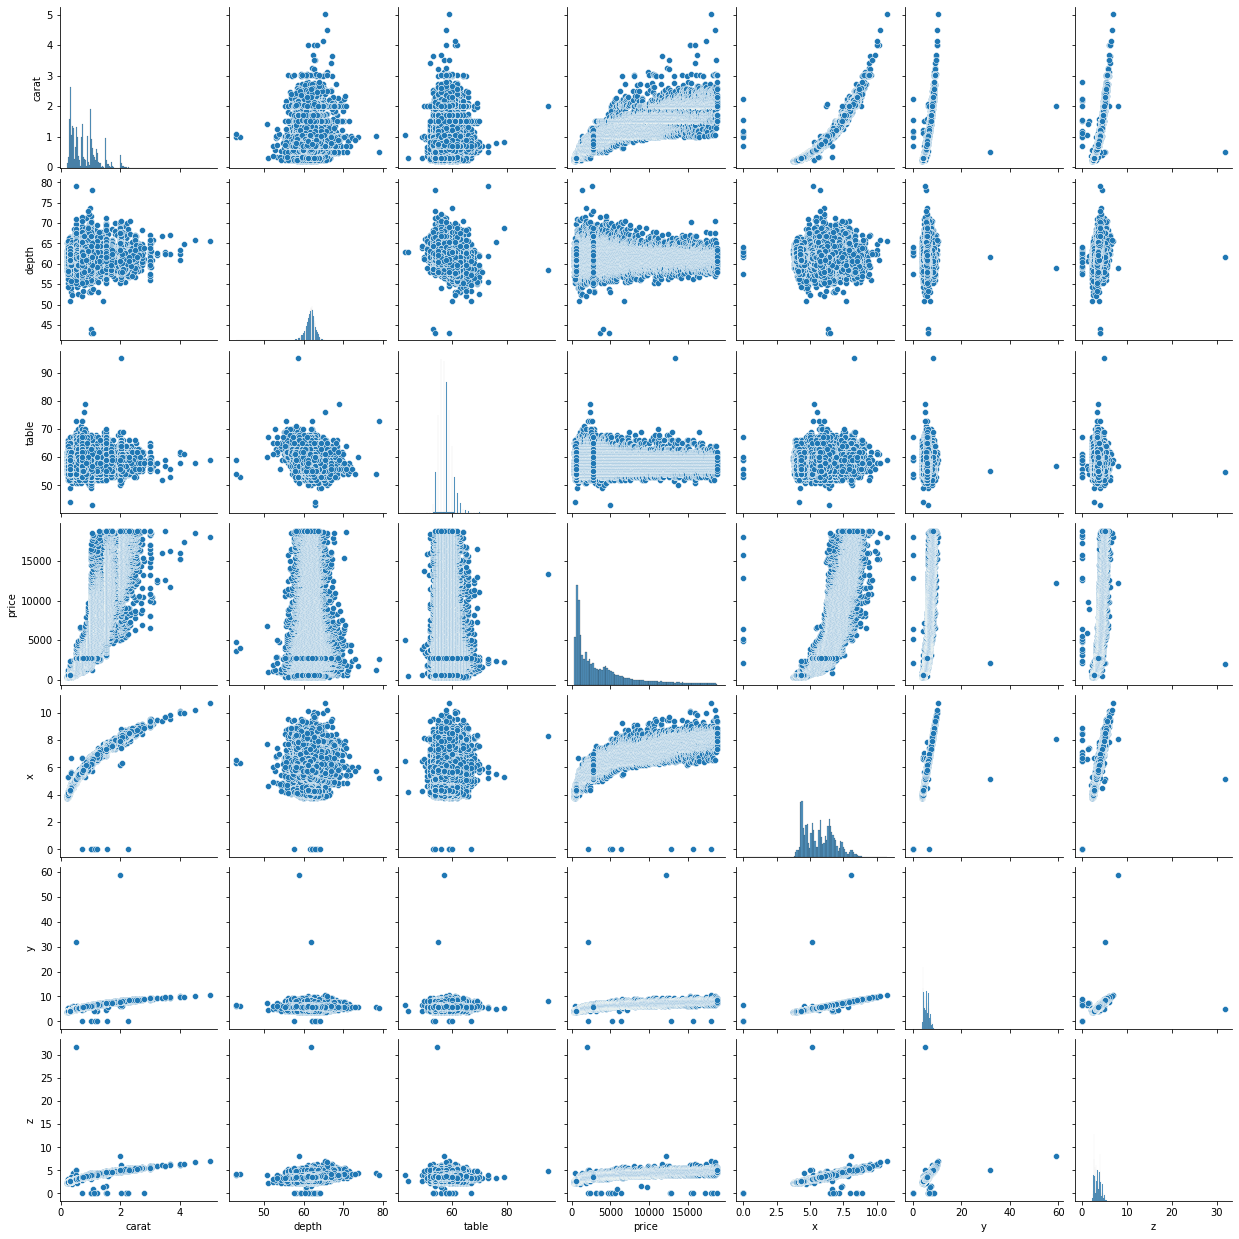

In [13]:
sns.pairplot(copyData)

**Notice :**
+ We can see that there is a lot of **outliers** so we need to get **rid** from them. 

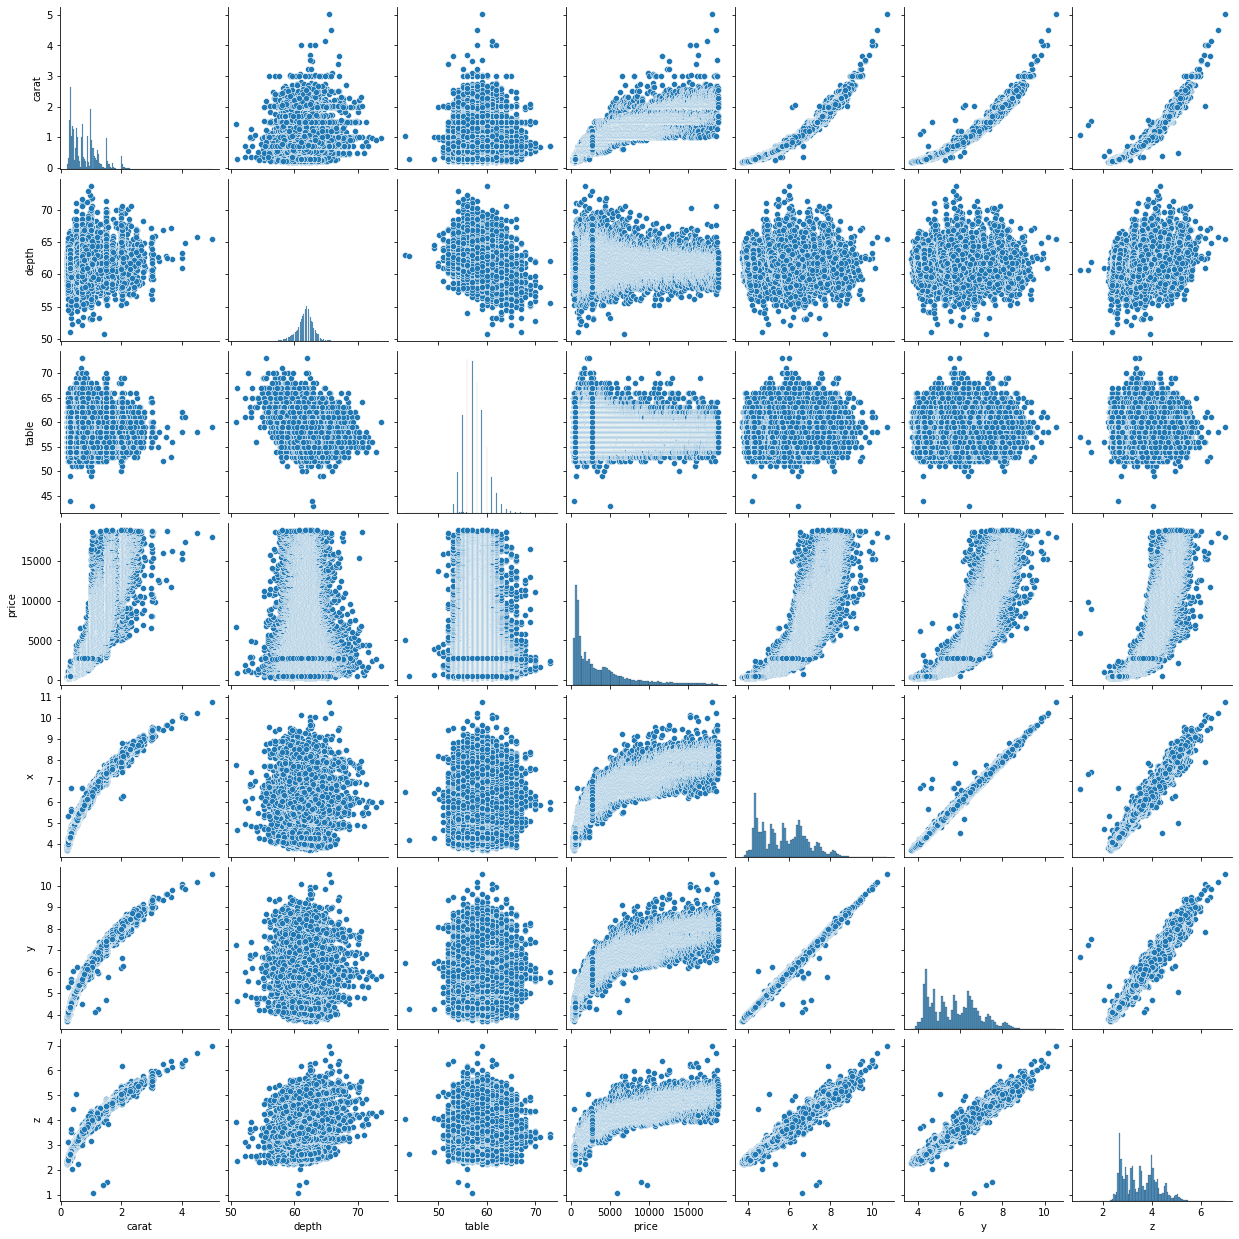

In [14]:
newData = copy.deepcopy(copyData.loc[(copyData.table <= 75) & (copyData.depth >= 40)
                      & (copyData.x != 0) & (copyData.y <= 15) 
                      & (copyData.y != 0) & (copyData.z <= 10) 
                      & (copyData.z != 0) & (copyData.depth <= 75)
                      & (copyData.depth >= 50)])
sns.pairplot(newData)

**Notice :**
+ Now it's look much better. 

**Now we will check the correlation between features and price.**

In [15]:
newData.corrwith(newData.price)

carat    0.921554
depth   -0.010737
table    0.126688
price    1.000000
x        0.887126
y        0.888715
z        0.882036
dtype: float64

**Notice :**
+ So, now we know which features have strong relationship with the price : **x**, **y**, **z** and **Carat**.

# **5. Decision Tree Regressor**
# Training the model.
**Importing library**

In [16]:
from sklearn.tree import DecisionTreeRegressor

# > Without changing features.

In [17]:
newData.head() # Showing our data that we work on.

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Defining the x_train and y_train.**
We will work only with numeric features.

In [18]:
x1_train = newData[['x', 'y', 'z', 'carat', 'table', 'depth']].values
x1_train

array([[ 3.95,  3.98,  2.43,  0.23, 55.  , 61.5 ],
       [ 3.89,  3.84,  2.31,  0.21, 61.  , 59.8 ],
       [ 4.05,  4.07,  2.31,  0.23, 65.  , 56.9 ],
       ...,
       [ 5.66,  5.68,  3.56,  0.7 , 60.  , 62.8 ],
       [ 6.15,  6.12,  3.74,  0.86, 58.  , 61.  ],
       [ 5.83,  5.87,  3.64,  0.75, 55.  , 62.2 ]])

In [19]:
y1_train = newData.price.values
y1_train

array([ 326,  326,  327, ..., 2757, 2757, 2757])

**Implementing the Decision Tree Regressor and getting our accuracy.**

In [20]:
# Fitting the model
reg1 = DecisionTreeRegressor().fit(x1_train, y1_train)

# Getting the score
acc = reg1.score(x1_train, y1_train)

# printing the accuracy
print(f'Our accuracy is {acc:.4f}') 

Our accuracy is 0.9985


**Notice :**
+ It's almost equal to 1 which is a **GOOD accuracy**.

# > With changing features.

**First we will make a copy of our DataFrame.**

In [21]:
regData = copy.deepcopy(newData)
regData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We already know that we have some features that they are **not numbers**, so we will change them. It's just like in **classification task** when we have like **Male**, **Female** we change them to **0**, **1** or whatever you want.

In [22]:
# Color column
regData.replace(to_replace=['J', 'I', 'D', 'H', 'F', 'E', 'G'], 
                value=[1, 2, 3, 4, 5, 6, 7], inplace=True)

# Cut column
regData.replace(to_replace=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                value=[1, 2, 3, 4, 5], inplace=True)

# Clarity column
regData.replace(to_replace=['I1', 'IF', 'VVS1', 'VVS2', 'VS1', 'SI2', 'VS2', 'SI1'],
                value=[1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

# Show data
regData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,6,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,8,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,7,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,6,63.3,58.0,335,4.34,4.35,2.75


**Defining the x_train and y_train.**

In [23]:
x2_train = regData[['x', 'y', 'z', 'carat', 'table', 'depth', 'cut', 'color', 'clarity']].values
x2_train

array([[3.95, 3.98, 2.43, ..., 5.  , 6.  , 6.  ],
       [3.89, 3.84, 2.31, ..., 4.  , 6.  , 8.  ],
       [4.05, 4.07, 2.31, ..., 2.  , 6.  , 5.  ],
       ...,
       [5.66, 5.68, 3.56, ..., 3.  , 3.  , 8.  ],
       [6.15, 6.12, 3.74, ..., 4.  , 4.  , 6.  ],
       [5.83, 5.87, 3.64, ..., 5.  , 3.  , 6.  ]])

In [24]:
y2_train = regData.price.values
y2_train

array([ 326,  326,  327, ..., 2757, 2757, 2757])

**Implementing the Decision Tree Regressor and getting our accuracy.**

In [25]:
# Fitting the model
reg2 = DecisionTreeRegressor().fit(x2_train, y2_train)

# Getting the score
acc = reg2.score(x2_train, y2_train)

# printing the accuracy
print(f'Our accuracy is {acc:.4f}') 

Our accuracy is 1.0000


**Notice :**
+ It's equal to 1 which is a **GREAT accuracy**.

# **6. Linear Regression SKLearn**

**Importing the model.**

In [26]:
from sklearn.linear_model import LinearRegression

**Implementing the Linear Regression and getting our accuracy.**
 

we will work with **x2_train**, **y2_train** as they get us to a **GEART accuracy** in **Decision Tree Regressor**.

In [27]:
# Fitting the model
regL = LinearRegression().fit(x2_train, y2_train) 

# Getting the score
accL = regL.score(x2_train, y2_train)

# printing the accuracy
print(f'Our accuracy is {accL:.4f}') 

Our accuracy is 0.8724


**Notice :**
+ It's not a **good accuracy** as **Decision Tree Regressor** but it's efficient.